<a href="https://colab.research.google.com/github/BDonadelli/Codigos-em-financas/blob/main/Ibov_desde_68.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# !pip install -q yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# índice de 1969 até hoje

de 1969 até 2022 são dados da B3:
https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-estatisticas-historicas.htm

de 2023-01 em diante são do yahoo finance

In [5]:
url='https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/ibov_desde_1968.csv'

In [8]:
b3 = pd.DataFrame()
b3 = pd.read_csv(url,sep=';') 
b3 = b3.set_index('data')
b3.index = pd.to_datetime(b3.index)
pd.options.display.float_format = '{:1,.13f}'.format
b3

,valor
data,
1968-01-02,0.0000000001000
1968-01-03,0.0000000001000
1968-01-04,0.0000000000990
1968-01-05,0.0000000000970
1968-01-08,0.0000000000970
...,...
2022-12-27,"108,578.1999999999971"
2022-12-28,"110,236.7100000000064"
2022-12-29,"109,734.6000000000058"


In [9]:
data = pd.DataFrame()
data['valor'] = yf.download("^BVSP", period = 'max',auto_adjust=True)['Close']
data.loc['2023-01-01':].head(2)


[*********************100%***********************]  1 of 1 completed


,valor
Date,
2023-01-02,"106,376.0000000000000"
2023-01-03,"104,166.0000000000000"


In [10]:
ibov = pd.concat([b3,data.loc['2023-01-01':]])

In [12]:
ibov.to_parquet('Ibov_69.parquet')
write_parquet_file()

NameError: name 'write_parquet_file' is not defined

In [ ]:
import pyarrow.csv as pv
import pyarrow.parquet as pq
table = pv.read_csv('/home/yair/GHub/Codigos-em-financas/ibov_desde_1968.csv')
pq.write_table(table, '/home/yair/GHub/Codigos-em-financas/ibov_desde_1968.parquet')

<Axes: >

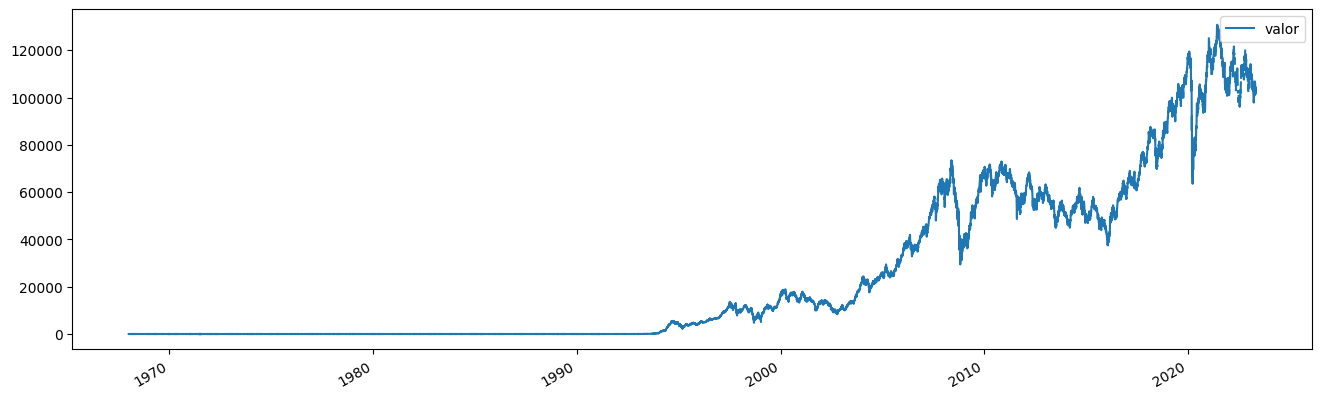

In [6]:
ibov.plot(figsize = (16,5))

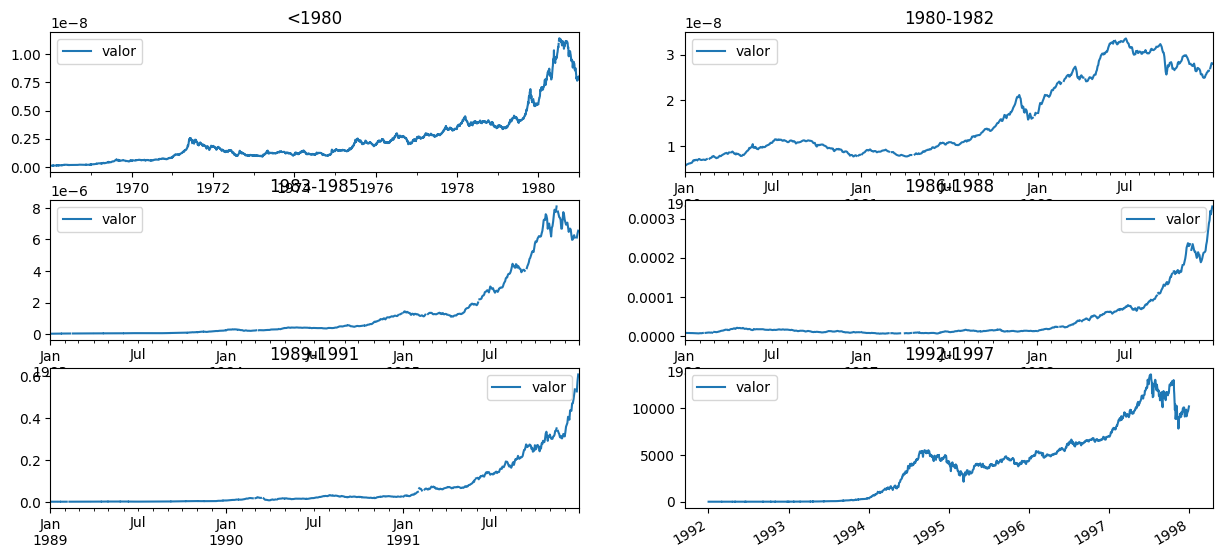

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=2 ,figsize=(15,7))

ibov.loc[:'1980'].plot(ax=axes[0,0]); axes[0,0].set_title('<1980')
ibov.loc['1980':'1982'].plot(ax=axes[0,1]); axes[0,1].set_title('1980-1982')
ibov.loc['1983':'1985'].plot(ax=axes[1,0]); axes[1,0].set_title('1983-1985')
ibov.loc['1986':'1988'].plot(ax=axes[1,1]); axes[1,1].set_title('1986-1988')
ibov.loc['1989':'1991'].plot(ax=axes[2,0]); axes[2,0].set_title('1989-1991')
ibov.loc['1992':'1997'].plot(ax=axes[2,1]); axes[2,1].set_title('1992-1997');


In [8]:
mensal=pd.DataFrame()
mensal['valor']= ibov.valor.copy()
mensal.index = pd.to_datetime(mensal.index)
mensal = mensal.resample('M').ffill()#agg(lambda x: (x + 1).prod() - 1)
mensal['retornos']=mensal.pct_change()
mensal

,valor,retornos
1968-01-31,0.0000000001070,NaN
1968-02-29,0.0000000001230,0.1495327102804
1968-03-31,0.0000000001340,0.0894308943089
1968-04-30,0.0000000001640,0.2238805970149
1968-05-31,0.0000000001780,0.0853658536585
...,...,...
2023-01-31,"113,532.0000000000000",0.0092988452520
2023-02-28,"104,932.0000000000000",-0.0757495684036
2023-03-31,"101,882.0000000000000",-0.0290664430298
2023-04-30,"104,432.0000000000000",0.0250289550657


In [9]:
returns_table = mensal.pivot_table(values='retornos', 
                               index=mensal.index.year, 
                               columns=mensal.index.month, 
                               aggfunc='mean')

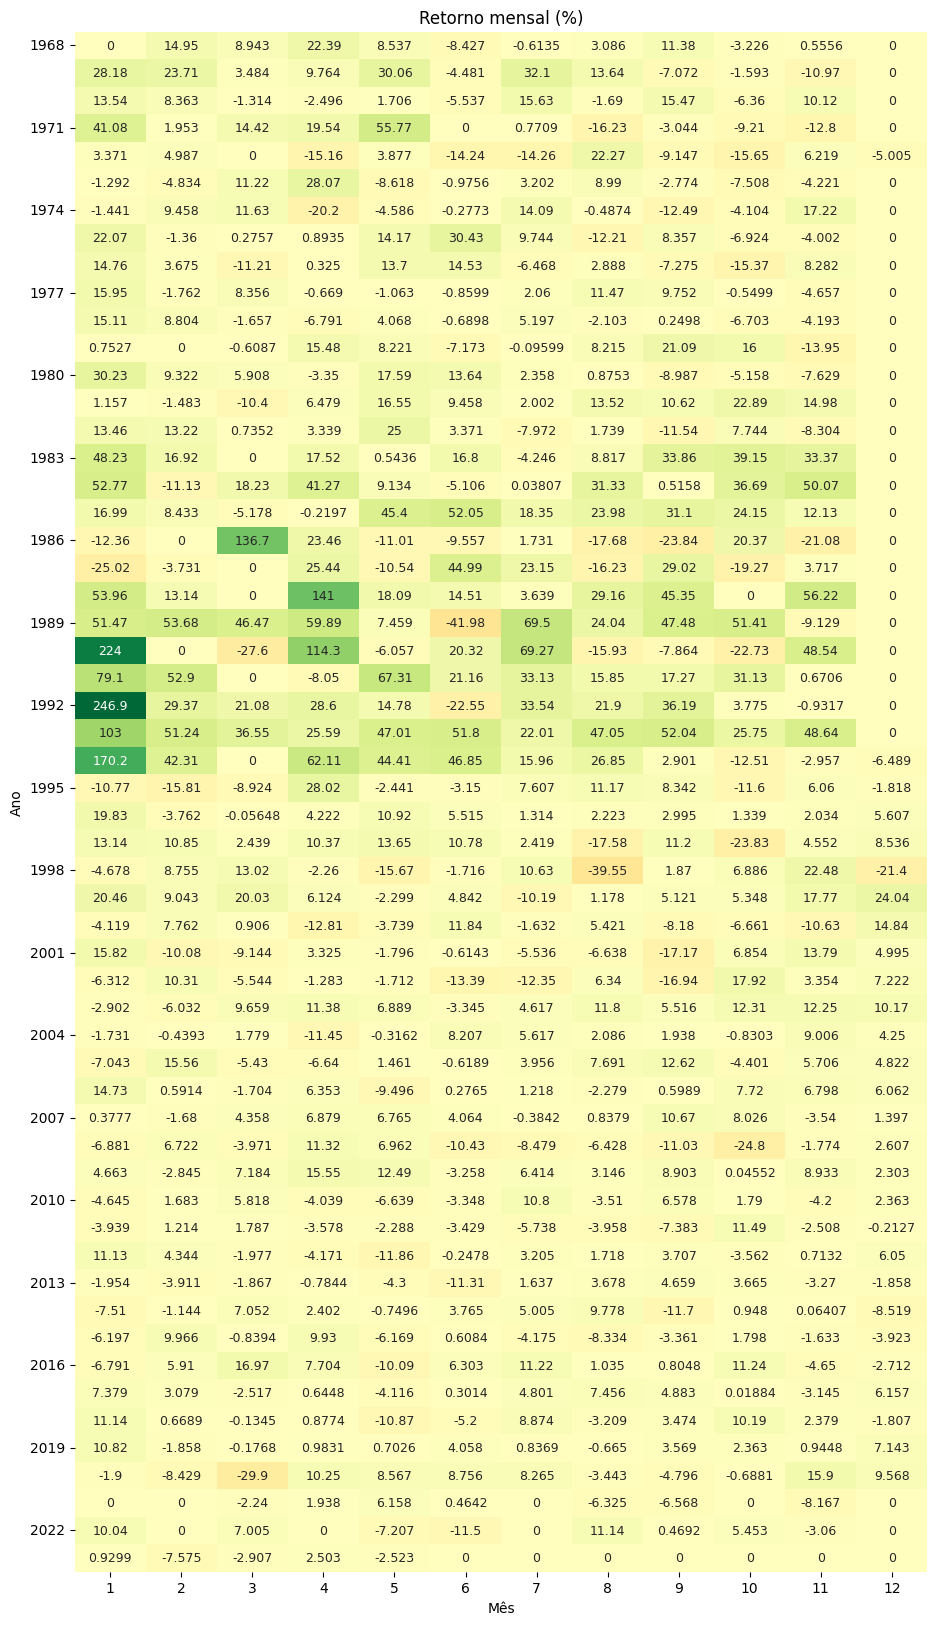

In [10]:
fig = plt.figure(1)

ax = plt.gca()

sns.heatmap(returns_table.fillna(0)*100.0,annot=True,annot_kws={"size": 9},cmap='RdYlGn',
            alpha=1.0,center=0.0,cbar=False,ax=ax, fmt='.4g')
ax.set_ylabel('Ano')
ax.set_xlabel('Mês')
ax.set_title("Retorno mensal (%)")
fig.set_size_inches(11,20)
plt.show()

<Axes: >

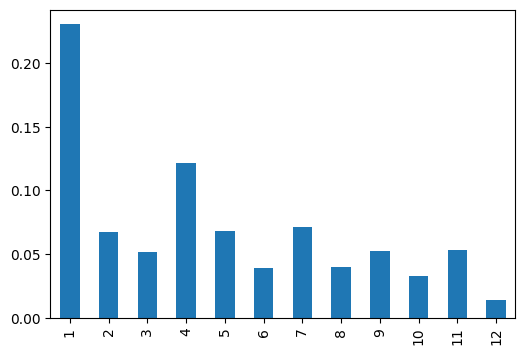

In [11]:
returns_table.mean().plot.bar(figsize=(6,4))

## usando o quantstats

In [12]:
!pip install -q quantstats
import quantstats as qs


In [13]:
retorno=ibov.pct_change()
retorno.dropna(inplace=True)

In [14]:
retorno

,valor
1968-01-03,0.0000000000000
1968-01-04,-0.0100000000000
1968-01-05,-0.0202020202020
1968-01-08,0.0000000000000
1968-01-09,0.0103092783505
...,...
2023-04-26,-0.0087967448169
2023-04-27,0.0059719290015
2023-04-28,0.0146614459353
2023-05-02,-0.0239869005669


In [15]:
plt.rcParams["font.family"] = "sans-serif"


[Performance Metrics]

                           Strategy
-------------------------  ---------------------------
Start Period               1968-01-03
End Period                 2023-05-03
Risk-Free Rate             0.0%
Time in Market             95.0%

Cumulative Return          101,797,000,000,002,000.00%
CAGR﹪                     86.66%

Sharpe                     1.75
Prob. Sharpe Ratio         100.0%
Smart Sharpe               1.54
Sortino                    2.87
Smart Sortino              2.52
Sortino/√2                 2.03
Smart Sortino/√2           1.78
Omega                      1.4

Max Drawdown               -72.85%
Longest DD Days            3400
Volatility (ann.)          39.16%
Calmar                     1.19
Skew                       0.89
Kurtosis                   12.8

Expected Daily %           0.24%
Expected Monthly %         5.33%
Expected Yearly %          85.35%
Kelly Criterion            15.62%
Risk of Ruin               0.0%
Daily Value-at-Risk        -3.79%

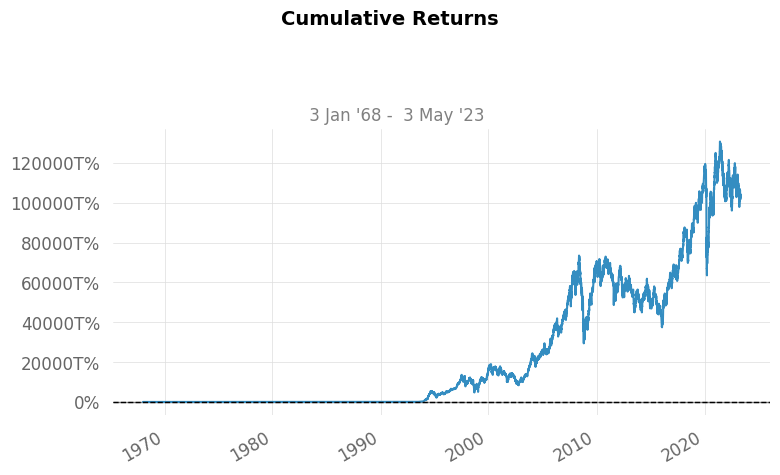

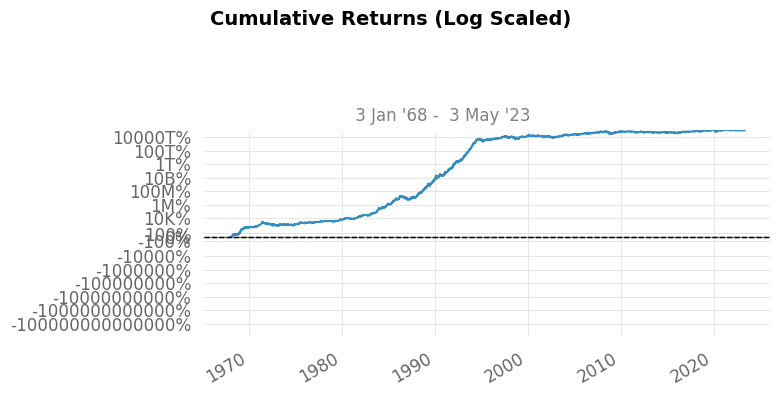

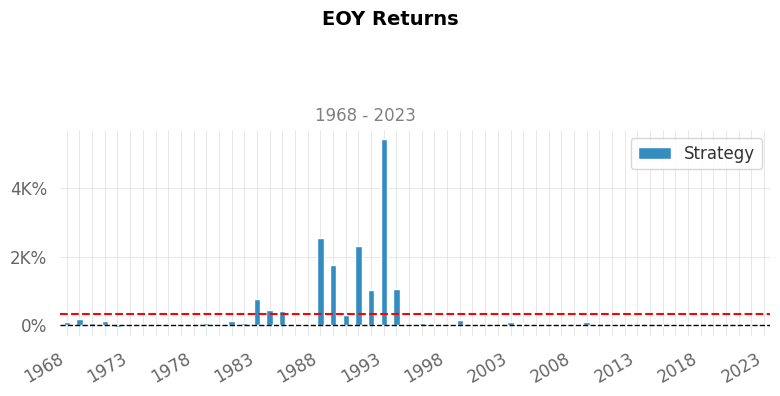

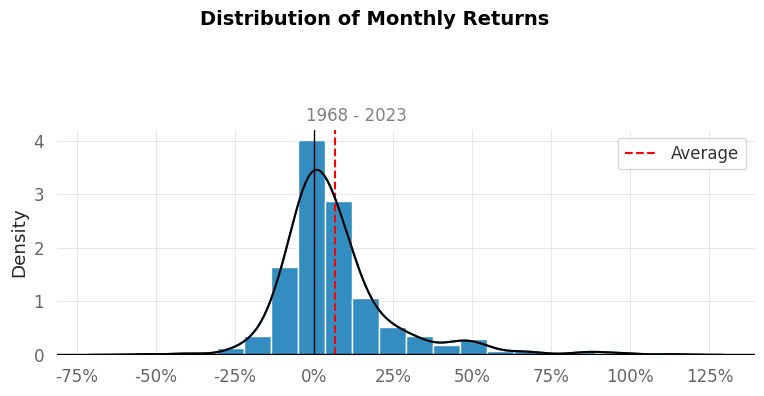

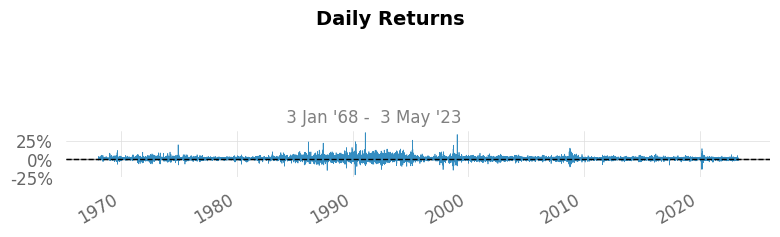

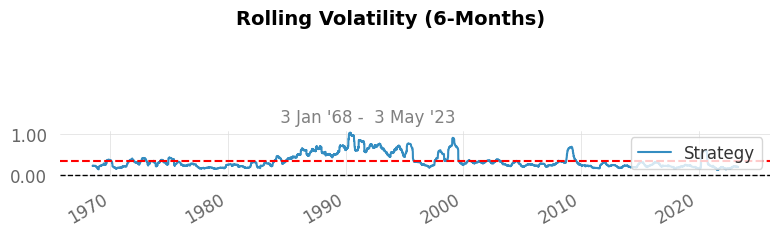

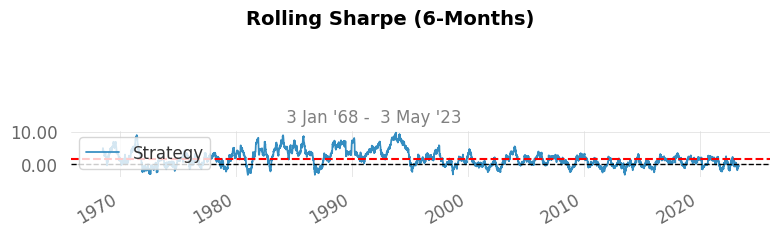

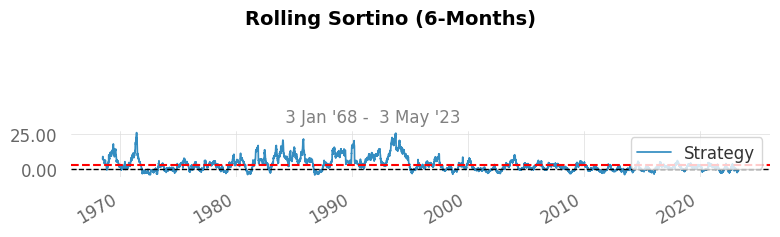

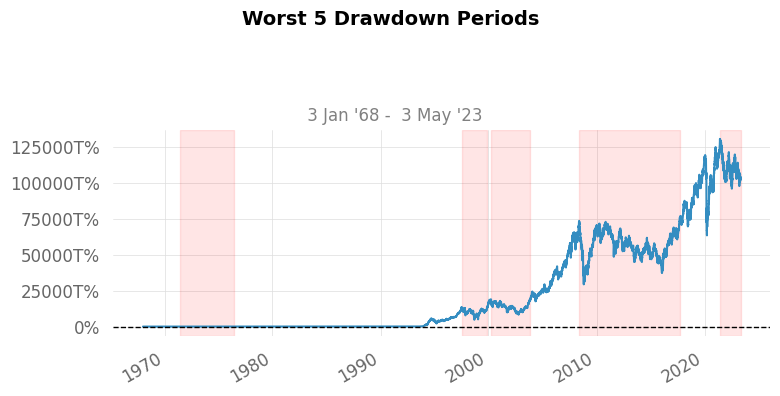

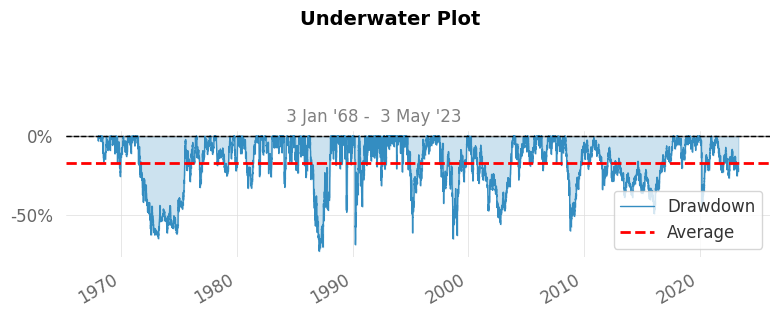

/usr/local/lib/python3.10/dist-packages/quantstats/stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


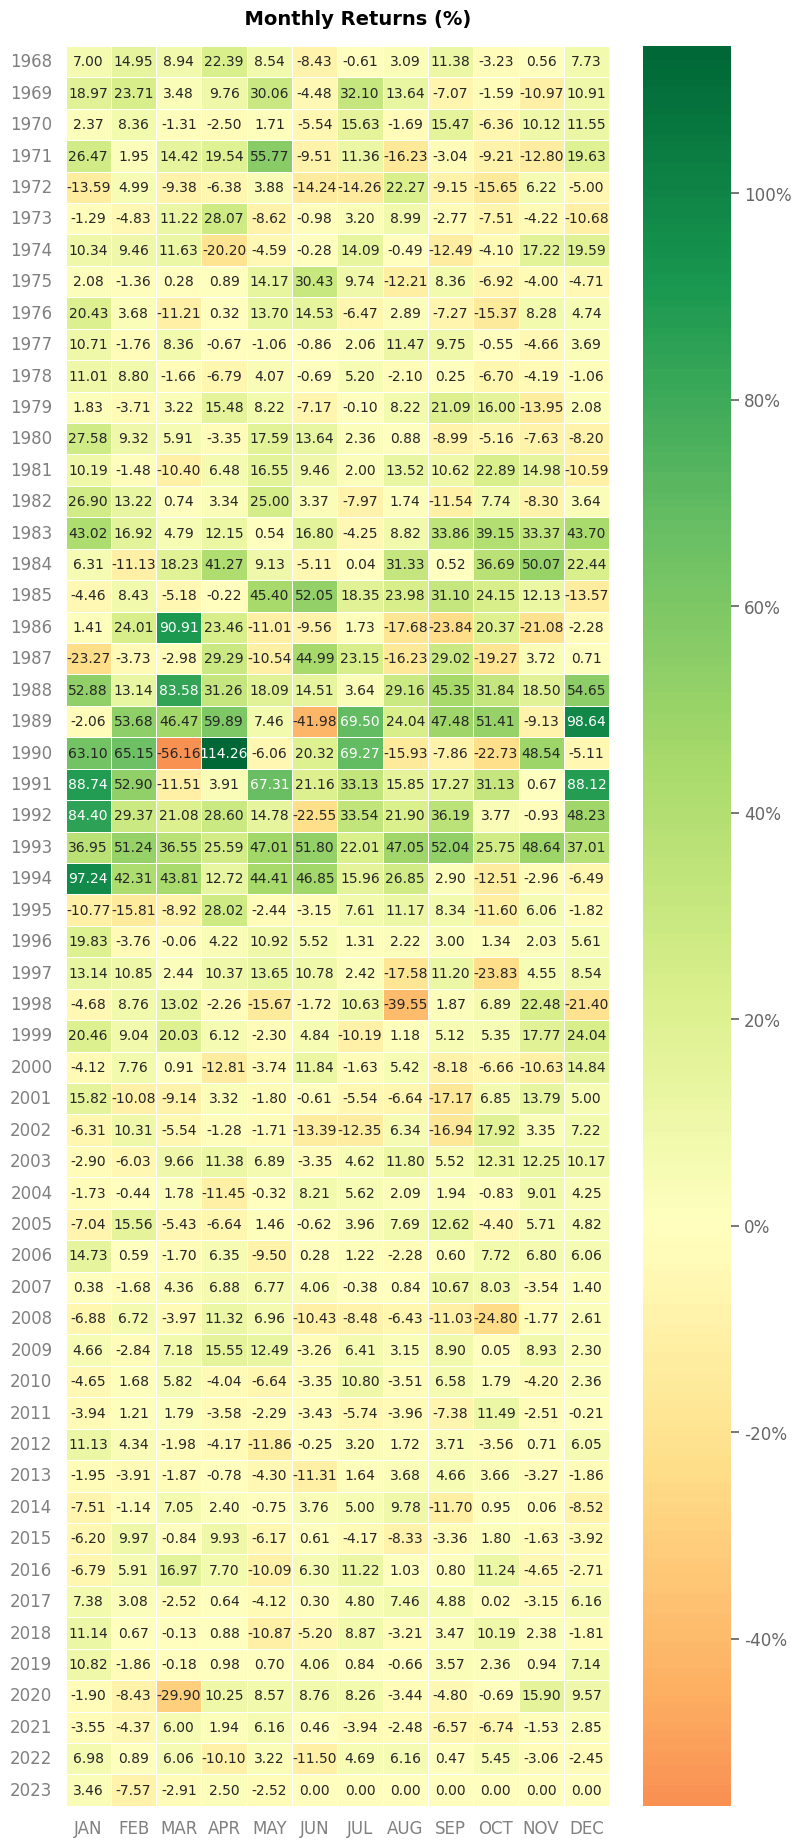

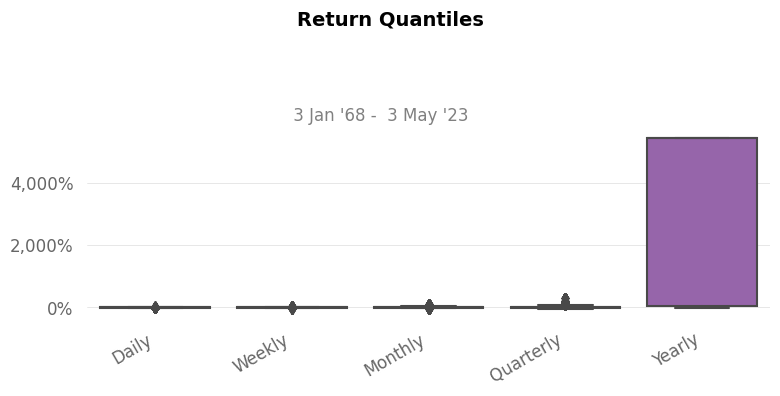

In [16]:
qs.reports.full(retorno.valor)

# escolhe um ano de 69 até 97 e monta data frame

os datos estão [nessa planilha](https://docs.google.com/spreadsheets/d/1pPBArWJlmt23PGRSRmQ40DzZPZNZKOJDkMsTGNUF6oM/edit?usp=sharing) (google sheet) que pode ser baixada [aqui, na b3](https://www.b3.com.br/data/files/A5/56/B2/36/245C5810F534EB48AC094EA8/IBOVDIA.zip) 

(tentei pegar direto a planilha com 
```
url2='https://github.com/BDonadelli/Codigos-em-financas/blob/main/IBOV_DIA_desde1969.XLS?raw=true'
db=pd.read_excel(url2) 
db
```
não deu certo ainda).

In [17]:
!pip install -qU  gspread-dataframe

In [18]:
!pip install -qU  gspread

In [19]:
import gspread
from google.colab import auth
auth.authenticate_user()

from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

from gspread_dataframe import get_as_dataframe, set_with_dataframe

In [20]:
titulo_planilha = 'Planilha_ibov_69+'
planilha = gc.open(titulo_planilha)
sheets = planilha.worksheets()
sheetslist = [sheet.title for sheet in sheets]
sheetslist.reverse()

print(sheetslist)

['1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997']


In [21]:
ano="1989"
worksheet = planilha.worksheet(ano)

In [22]:
# pega só a perte relevante da planilha
df2 = get_as_dataframe(worksheet, parse_dates=True, 
                       usecols=range(0,13),
                       skiprows=range(34,1000), 
                       header= 1)

# renomeia as colunas 
colunas = {'PREGÃO': 'dia', 'JAN':'01','FEV':'02','MAR':'03','ABR':'04','MAIO':'05',
           'JUN':'06','JUL':'07','AGO':'08','SET':'09','OUT':'10','NOV':'11','DEZ':'12'}
df2.rename(columns=colunas, inplace=True)

# dia vem como float, pra tratar NaN ussa tipo 'Int64' - Nullable Integer Data Type.
df2['dia'] = df2['dia'].astype('Int64')

In [23]:
df2

,dia,01,02,03,04,05,06,07,08,09,10,11,12
0,1,NaN,0.0003385440000,0.0004988850000,NaN,NaN,0.0012927600000,NaN,0.0012225200000,0.0015413500000,NaN,0.0033751400000,0.0032742200000
1,2,0.0003237980000,0.0003566640000,0.0005136700000,NaN,0.0011673300000,0.0013162300000,NaN,0.0011965300000,NaN,0.0021490600000,NaN,NaN
2,3,0.0003191900000,0.0003781210000,0.0005396180000,0.0007639710000,0.0011068600000,NaN,0.0007112400000,0.0012470500000,NaN,0.0021704300000,0.0033537600000,NaN
3,4,0.0003391940000,NaN,NaN,0.0007926020000,0.0010211700000,NaN,0.0007219900000,0.0012976100000,0.0014885200000,0.0022712400000,NaN,0.0033175400000
4,5,0.0003402520000,NaN,NaN,0.0008100370000,0.0011307700000,0.0013060800000,0.0007622100000,NaN,0.0014682500000,0.0024636000000,NaN,0.0031687800000
5,6,0.0003418890000,NaN,0.0005534540000,0.0007623630000,NaN,0.0012750300000,0.0008323000000,NaN,0.0015351100000,0.0026681100000,0.0031639800000,0.0032575200000
6,7,NaN,NaN,0.0005261550000,0.0008009150000,NaN,0.0012058800000,0.0008860300000,0.0013495000000,NaN,NaN,0.0030810800000,0.0033596500000
7,8,NaN,NaN,0.0005498300000,NaN,0.0011491500000,0.0012073800000,NaN,0.0013743800000,0.0015897800000,NaN,0.0030457300000,0.0032061100000
8,9,0.0003408690000,0.0003970560000,0.0005711230000,NaN,0.0010692000000,0.0011387900000,NaN,0.0013524200000,NaN,NaN,0.0031869400000,NaN
9,10,0.0003567820000,0.0003984170000,0.0005561520000,0.0008285320000,0.0010310300000,NaN,0.0009185500000,0.0013573600000,NaN,0.0027828900000,0.0030578900000,NaN


In [24]:
# despivota a tabela 
df= pd.melt(df2, id_vars='dia', value_vars=['01','02','03','04','05','06','07','08','09','10','11','12'])
df.columns = ['dia','mes','valor']

#insere a coluna ano
df.insert(2, 'ano', ano)

# forma coluna com data e remove as outras
df.dia = df.dia.astype(str)
df['data'] = df[['ano', 'mes', 'dia']].agg('-'.join, axis=1)
df.drop(['dia','mes','ano'], axis='columns', inplace=True)

#joga fora os feriados e fins de semana
df = df.dropna()

# passa data pro indice
df['data']= pd.to_datetime(df['data'])
df = df.set_index('data')

df

,valor
data,
1989-01-02,0.0003237980000
1989-01-03,0.0003191900000
1989-01-04,0.0003391940000
1989-01-05,0.0003402520000
1989-01-06,0.0003418890000
...,...
1989-12-21,0.0051155800000
1989-12-22,0.0054734600000
1989-12-26,0.0061650400000


## ou carrega de um .csv na pasta local

In [25]:
!ls *.csv

 2021.csv		        ibov_desde_1968.csv
'Evolucao_Diaria (2022).csv'   'ibov - ibov_desde_1968.csv'
 ibov_desde_1968_ate_2022.csv


In [27]:
anual =  pd.read_csv('/content/Evolucao_Diaria.csv' , sep=';' , encoding='latin1',
                    thousands = '.', decimal = ',',
                    usecols=range(0,13),
                    skiprows=range(34,1000), 
                    header= 1)
anual

,Dia,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,1,NaN,"113,228.3099999999977",NaN,"121,570.1499999999942",NaN,"111,359.9400000000023","98,953.8999999999942","102,225.0800000000017","110,405.3000000000029",NaN,"116,928.6600000000035","110,925.6000000000058"
1,2,NaN,"111,894.3600000000006","115,173.6100000000006",NaN,"106,638.6399999999994","112,392.9100000000035",NaN,"103,361.6999999999971","110,864.2400000000052",NaN,NaN,"111,923.9299999999930"
2,3,"103,921.5899999999965","111,695.9400000000023","115,165.5500000000029",NaN,"106,528.0899999999965","111,102.3200000000070",NaN,"103,774.6799999999930",NaN,"116,134.4600000000064","116,896.3600000000006",NaN
3,4,"103,513.6399999999994","112,244.9400000000023","114,473.7799999999988","121,279.5099999999948","108,343.7400000000052",NaN,"98,608.7599999999948","105,892.2200000000012",NaN,"116,230.1199999999953","118,155.4600000000064",NaN
4,5,"101,005.6399999999994",NaN,NaN,"118,885.1499999999942","105,304.1900000000023",NaN,"98,294.6399999999994","106,471.9199999999983","112,203.3500000000058","117,197.8200000000070",NaN,"109,401.4100000000035"
5,6,"101,561.0500000000029",NaN,NaN,"118,227.7500000000000","105,134.7299999999959","110,185.9100000000035","98,718.9799999999959",NaN,"109,763.7700000000041","117,560.8300000000017",NaN,"110,188.5700000000070"
6,7,"102,719.4700000000012","111,996.3999999999942","111,593.4600000000064","118,862.1199999999953",NaN,"110,069.7599999999948","100,729.7200000000012",NaN,NaN,"116,375.2500000000000","115,342.3999999999942","109,068.5500000000029"
7,8,NaN,"112,234.4600000000064","111,203.4499999999971","118,322.2599999999948",NaN,"108,367.6699999999983","100,288.9400000000023","108,402.2700000000041","109,915.6399999999994",NaN,"116,160.3500000000058","107,249.0399999999936"
8,9,NaN,"112,461.3899999999994","113,900.3399999999965",NaN,"103,250.0200000000041","107,093.7100000000064",NaN,"108,651.0500000000029","112,300.4100000000035",NaN,"113,580.0899999999965","107,519.5599999999977"
9,10,"101,945.1999999999971","113,367.7700000000041","113,663.1300000000047",NaN,"103,109.9400000000023","105,481.2299999999959",NaN,"110,235.7599999999948",NaN,"115,940.6399999999994","109,775.4600000000064",NaN


In [28]:
# renomeia as colunas 
colunas = {'Dia': 'dia', 'Jan':'01','Fev':'02','Mar':'03','Abr':'04','Mai':'05',
           'Jun':'06','Jul':'07','Ago':'08','Set':'09','Out':'10','Nov':'11','Dez':'12'}
anual.rename(columns=colunas, inplace=True)


# despivota a tabela 
ano= pd.melt(anual , id_vars='dia', value_vars=['01','02','03','04','05','06','07','08','09','10','11','12'])
ano.columns = ['dia','mes','valor']

#insere a coluna ano
ano.insert(2, 'ano', '2022')

# apagar algumas datas que não estão no calendário (29/02, 30/02, 31/04)
ano.drop([59,60,61,123,185,278,340], axis=0, inplace=True)

# forma coluna com data e remove as outras
ano.dia = ano.dia.astype(str)
ano['data'] = ano[['ano', 'mes', 'dia']].agg('-'.join, axis=1)
ano.drop(['dia','mes','ano'], axis='columns', inplace=True)


# passa data pro indice
ano['data']= pd.to_datetime(ano['data'])
ano = ano.set_index('data')
ano

,valor
data,
2022-01-01,NaN
2022-01-02,NaN
2022-01-03,"103,921.5899999999965"
2022-01-04,"103,513.6399999999994"
2022-01-05,"101,005.6399999999994"
...,...
2022-12-27,"108,578.1999999999971"
2022-12-28,"110,236.7100000000064"
2022-12-29,"109,734.6000000000058"


In [40]:
ano['retornos'] = ano.valor.pct_change()
ano.dropna(inplace=True)

array([[<Axes: title={'center': 'valor'}>,
        <Axes: title={'center': 'retornos'}>]], dtype=object)

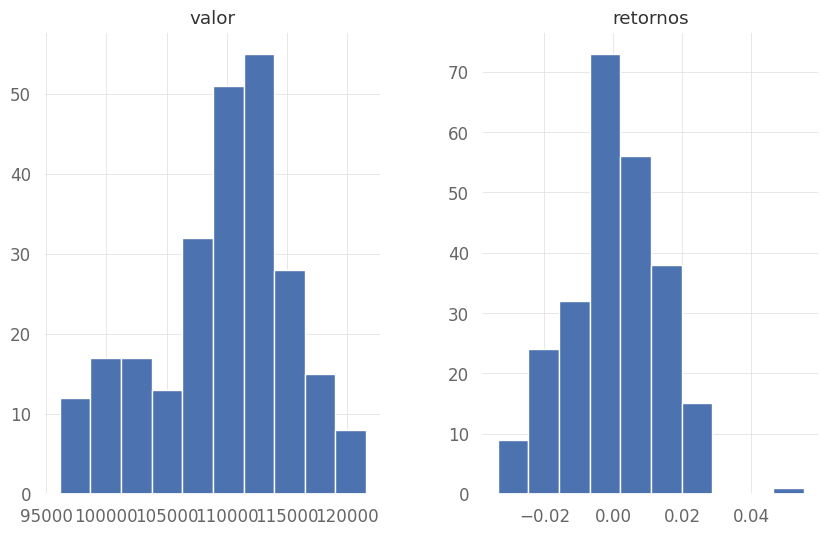

In [41]:
ano.hist()